In [1]:
import sys
sys.path.insert(0, './Trees')

import numpy as np
import matplotlib.pyplot as plt

from Utils_dendrograms_OPT import prune_dendro, from_cloud_to_dendro_sublvl
from Interleaving_distance import interleaving, interl_approx

In [2]:
import skfda

from skfda.datasets import fetch_nox


### Load Data Set

In [3]:
dataset = fetch_nox()
data = dataset['data']

# Building Merge Trees from Functions

### Choose the First Function

In [4]:
idx_f = 0 #choose one function in the data set
fd = data[idx_f]

f = fd.data_matrix[0].reshape(len(fd.data_matrix[0]))
grid_f = fd.grid_points[0]

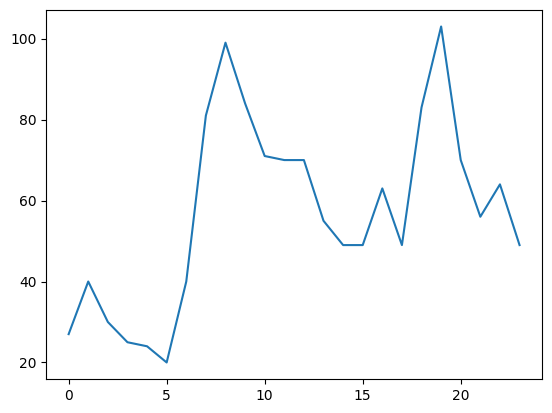

In [5]:
plt.plot(grid_f,f)

### Build the First Merge Tree

In [6]:
D = np.arange(0,len(grid_f)) #dummy domain for building the merge treee

T_f = from_cloud_to_dendro_sublvl(D,f,1.01, None,\
                                prec = 0.0000001, prune_param = None, ITris=[])

T_f.make_mult(f=False) #computations needed to compute the interleaving distance

Non iniettiva:  18 24
Ora è iniettiva:  24 24


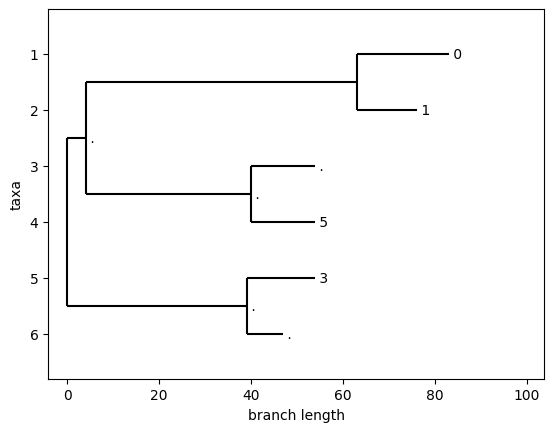

In [7]:
T_f.plot_newick()

### Choose the Second Function

In [8]:
idx_g = 1#choose a second function in the data set
fd = data[idx_g]


g = fd.data_matrix[0].reshape(len(fd.data_matrix[0]))
grid_g = fd.grid_points[0]

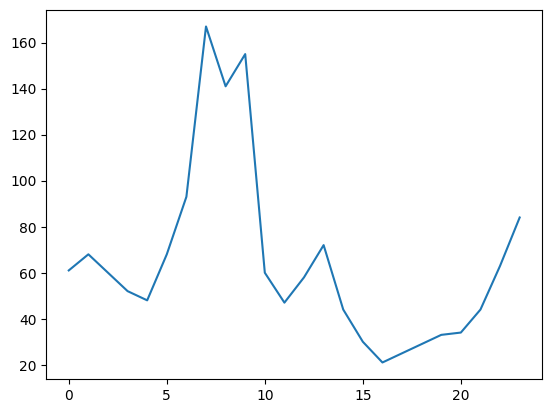

In [9]:
plt.plot(grid_g,g)

### Build the Second Merge Tree

In [10]:
D = np.arange(0,len(grid_g)) #dummy domain for building the merge treee

T_g = from_cloud_to_dendro_sublvl(D,g,1.01, None,\
                                prec = 0.0000001, prune_param = None, ITris=[])

T_g.make_mult(f=False) #computations needed to compute the interleaving distance

Non iniettiva:  21 24
Ora è iniettiva:  24 24


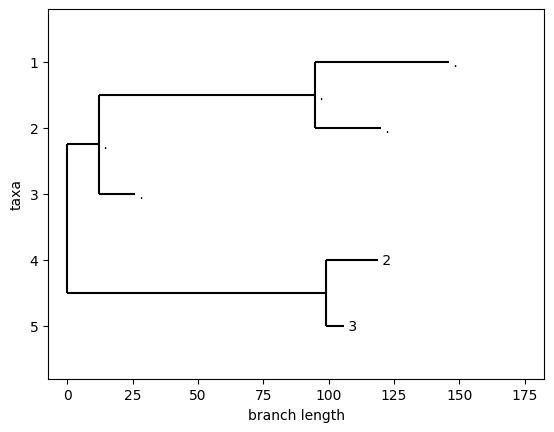

In [11]:
T_g.plot_newick()

# Computing Upper and Lower Bounds, and Checking Stability 

In [12]:
upper_bound = interleaving(T_f, T_g, binary=True,approx='up', 
                                          MP=True, check=False,
                                          verbose = False)

In [13]:
lower_bound = interleaving(T_f, T_g, binary=True,approx='down', 
                                          MP=True, check=False,
                                          verbose = False)

In [14]:
norm = np.max(np.abs(f-g))

In [15]:
print(lower_bound,upper_bound,norm)

59.5 59.5 86.0
